### Practical Task 22 - Random Forest:

* Continue with previous jupyter notebook from Task 21 and name as Decision_Tree.ipynb
* Create a bagged, random forest, and boosted tree for the Titanic data set in
the same way that you created a regular classification tree.
* From the random forest model, determine which of the features is the one
that contributes the most to predicting whether a passenger survives or
not.
* Pick one of these methods, and tune the parameters n_estimators and
max_depth.
* Report the accuracy of all models and report which model performed the
best, including the values for n_estimators and max_depth that the best
model had.

In [465]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
# Import libraries

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
# Used sklearn to split data into training and testing set after applying imputation and scaling


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier


from sklearn import tree
from sklearn.model_selection import cross_validate
from scipy.stats import randint
# Import Decision Tree and Random Forest and other classifiers


from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error
# Used sklearn specific library to create confusion_matrix, accuracy score, recall_score and classification report

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call
# Import libraries for visualisation and plotting


%matplotlib inline
# Line of code to save and pan, as using Matplotlib to plot and render

&nbsp;

In [466]:
titanic_df = pd.read_csv("titanic.csv")

titanic_df.head()
# Import, read and explore the dataset

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [467]:
titanic_df.info()
# Show total rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [468]:
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)
# Chosen to drop Cabin, Name, Ticket and PassengerId columns, these are not required for creating decision tree

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Adding one-hot encoding to column "Sex"

In [469]:
titanic_df["Sex"].unique()
# Check unique values in "Sex" column.

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, converted it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and it represents a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas using: get_dummies()

In [470]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"], dtype=int)
titanic_df.head()
# Use array scaling, one hot encoding to add the additional relative columns individually
# by using create (n_catogries). 

Survived  Pclass   Age  SibSp  Parch     Fare Embarked  Sex_female  \
0         0       3  22.0      1      0   7.2500        S           0   
1         1       1  38.0      1      0  71.2833        C           1   
2         1       3  26.0      0      0   7.9250        S           1   
3         1       1  35.0      1      0  53.1000        S           1   
4         0       3  35.0      0      0   8.0500        S           0   

   Sex_male  
0         1  
1         0  
2         0  
3         0  
4         1

Using the same One-Hot encoding scaling technique as above, to the "Embarked" column.

In [471]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"],  dtype=int)
titanic_df.head()
# Use array scaling, one hot encoding to add the additional relative columns individually used create (n_catogries) for column Embarked

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         0       3  22.0      1      0   7.2500           0         1   
1         1       1  38.0      1      0  71.2833           1         0   
2         1       3  26.0      0      0   7.9250           1         0   
3         1       1  35.0      1      0  53.1000           1         0   
4         0       3  35.0      0      0   8.0500           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

In [472]:
titanic_df.info()
# Show updated total rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    int32  
 7   Sex_male    891 non-null    int32  
 8   Embarked_C  891 non-null    int32  
 9   Embarked_Q  891 non-null    int32  
 10  Embarked_S  891 non-null    int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 59.3 KB


In [473]:
titanic_df.isnull().sum()
# Identifying any null values in the dataset

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [474]:
imputer = SimpleImputer(strategy='most_frequent')
titanic_df.loc[:,['Age']] = imputer.fit_transform(titanic_df[['Age']])
# Imputing for missing values in column 'Age', with sklearn simple imputer.

In [475]:
titanic_df.isnull().any()
# Re-check for any null values in the dataset

Survived      False
Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Sex_female    False
Sex_male      False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

<Axes: >

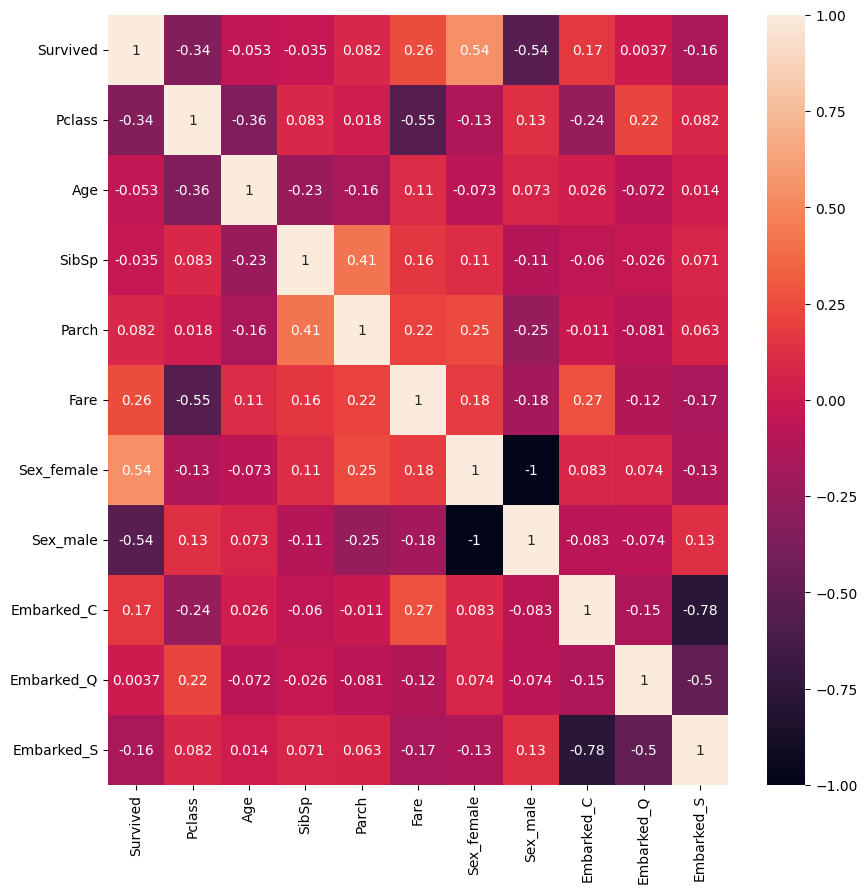

In [476]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic_df.iloc[:,:].corr(), annot = True)
# Checking for correlation using a seaborn heatmap

In [477]:
X = titanic_df.iloc[:, 1:]
y = titanic_df.iloc[:, 0]

Choosing the required target variable and assigning to y and selecting the independent variables and assigning to X

Checking the first 5 values of the target variable

In [478]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Train, Development and Test Split

In [479]:
# Random state
r = 42

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= r) # 80% training and 20% test

X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = r) # 50% training and development set and 50% test set

### DecisionTreeClassifier

In [480]:
# Create a Decision Tree Classifier 
# Training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=42)

# Train the Decision Tree for test dataset
unpruned.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

Predict, plot and check decision tree for train and test accuracy

In [481]:
y_train_pred = unpruned.predict(X_train)
y_test_pred = unpruned.predict(X_test)
# Predict the response for test dataset for an initial view of unpruned tree

In [482]:
score = unpruned.score(X_dev, y_dev)
# Model's accuracy on development set dataset:

print('Accuracy: {}'.format(score))
print("At depth:", unpruned.tree_.max_depth)

Accuracy: 0.797752808988764
At depth: 20


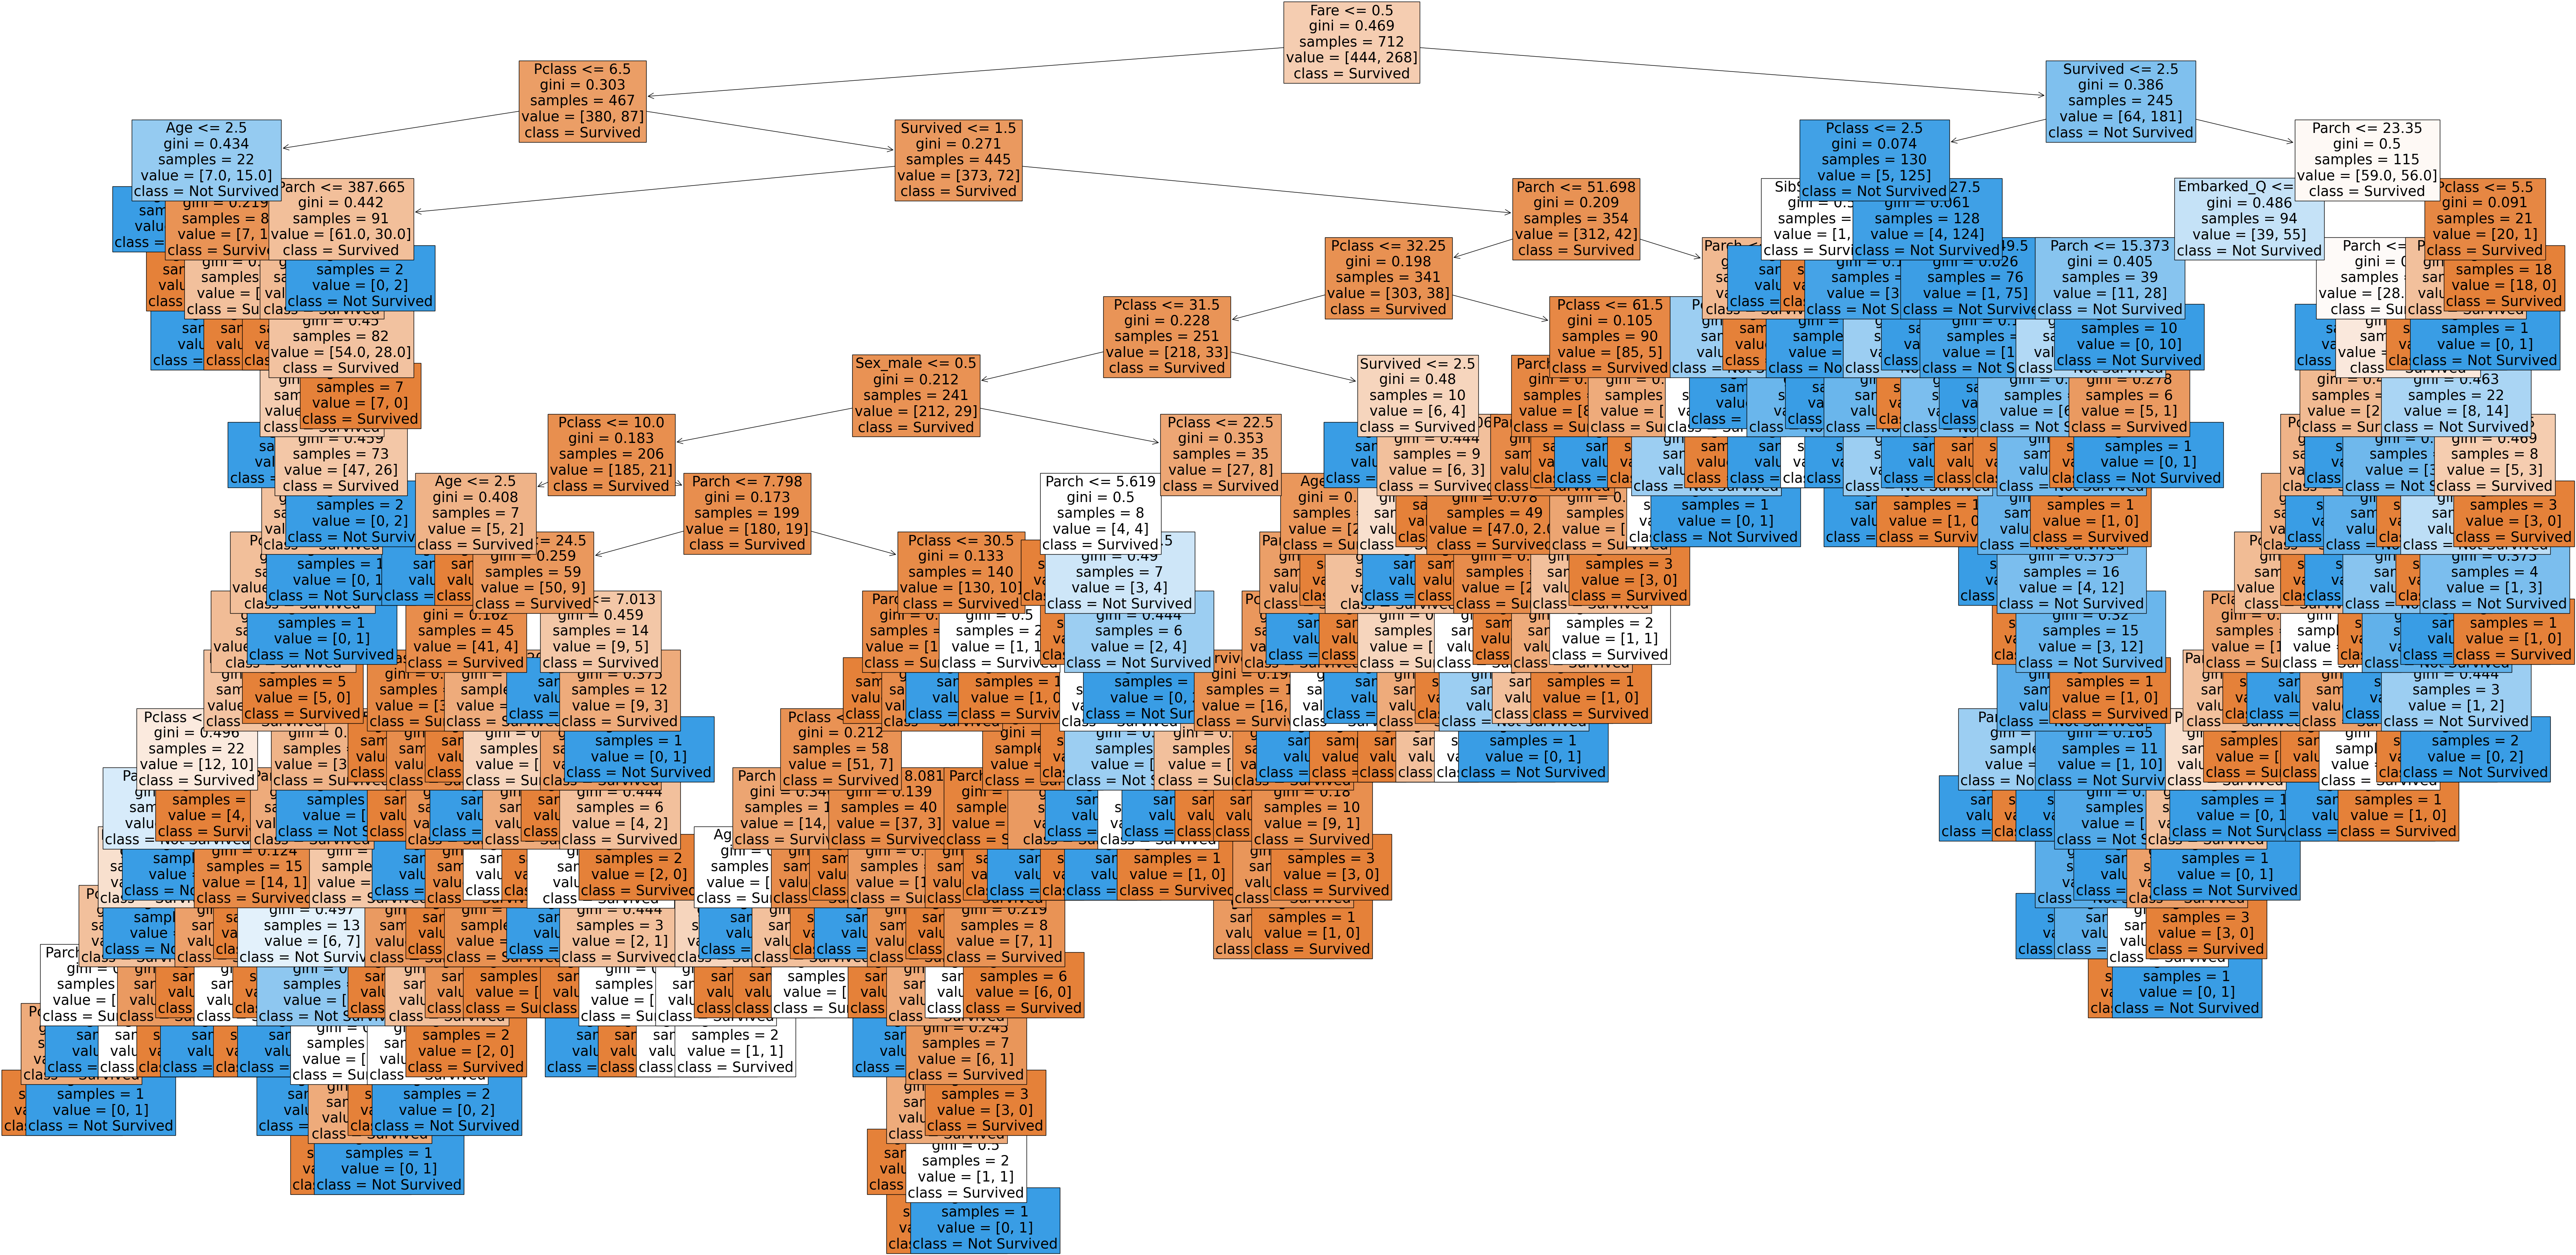

In [483]:
plt.figure(figsize=(80,40))
features = titanic_df.columns
classes = ['Survived', 'Not Survived']
tree.plot_tree(unpruned, feature_names = features, class_names = classes, filled = True, fontsize = 25)
plt.show()
# Decision tree with no restriction imposed on depth of the tree

In [484]:
print(f'Training Accuracy : {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy without pruning : {accuracy_score(y_test, y_test_pred)}')
print("At depth:", unpruned.tree_.max_depth)
# Model Accuracy post Training and Test, of unpruned trees

Training Accuracy : 0.9789325842696629
Testing Accuracy without pruning : 0.7444444444444445
At depth: 20


Text(0, 0.5, 'Accuracy')

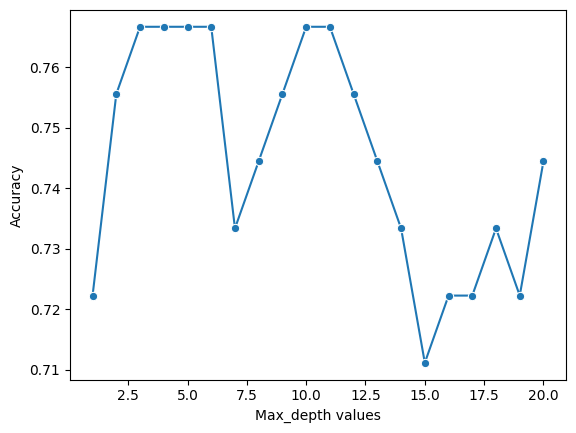

In [485]:
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=1)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

sns.lineplot(x=pruned_depths,y=pruned_scores, marker="o")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
# looking at effect of max_depth vs optimal depth due to pruning

Fitting the tree with max_depth that gives best accuracy i.e. the pruned tree

In [486]:
# Fitting the chosen tree with optimal max_depth
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth, random_state=r, min_samples_leaf=2)
# Create a Decision Tree Classifier for a pruned tree

pruned.fit(X_train,y_train)
# Train Decision Tree Classifer

y_test_pred = pruned.predict(X_test)
#Predict the response for test dataset

print("Training Accuracy:",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:",accuracy_score(y_test, y_test_pred))
# Model Accuracy of Training and Testing set the post fitting a decision tree classifier

Best performance reached at depth of: 3
Training Accuracy: 0.9789325842696629
Testing Accuracy: 0.7666666666666667


In [487]:
score_pruned = pruned.score(X_dev, y_dev)
# Model's accuracy on development set dataset:

print('Accuracy of pruned_dev: {}'.format(score_pruned))
print("At depth:", pruned.tree_.max_depth)

Accuracy of pruned_dev: 0.8314606741573034
At depth: 3


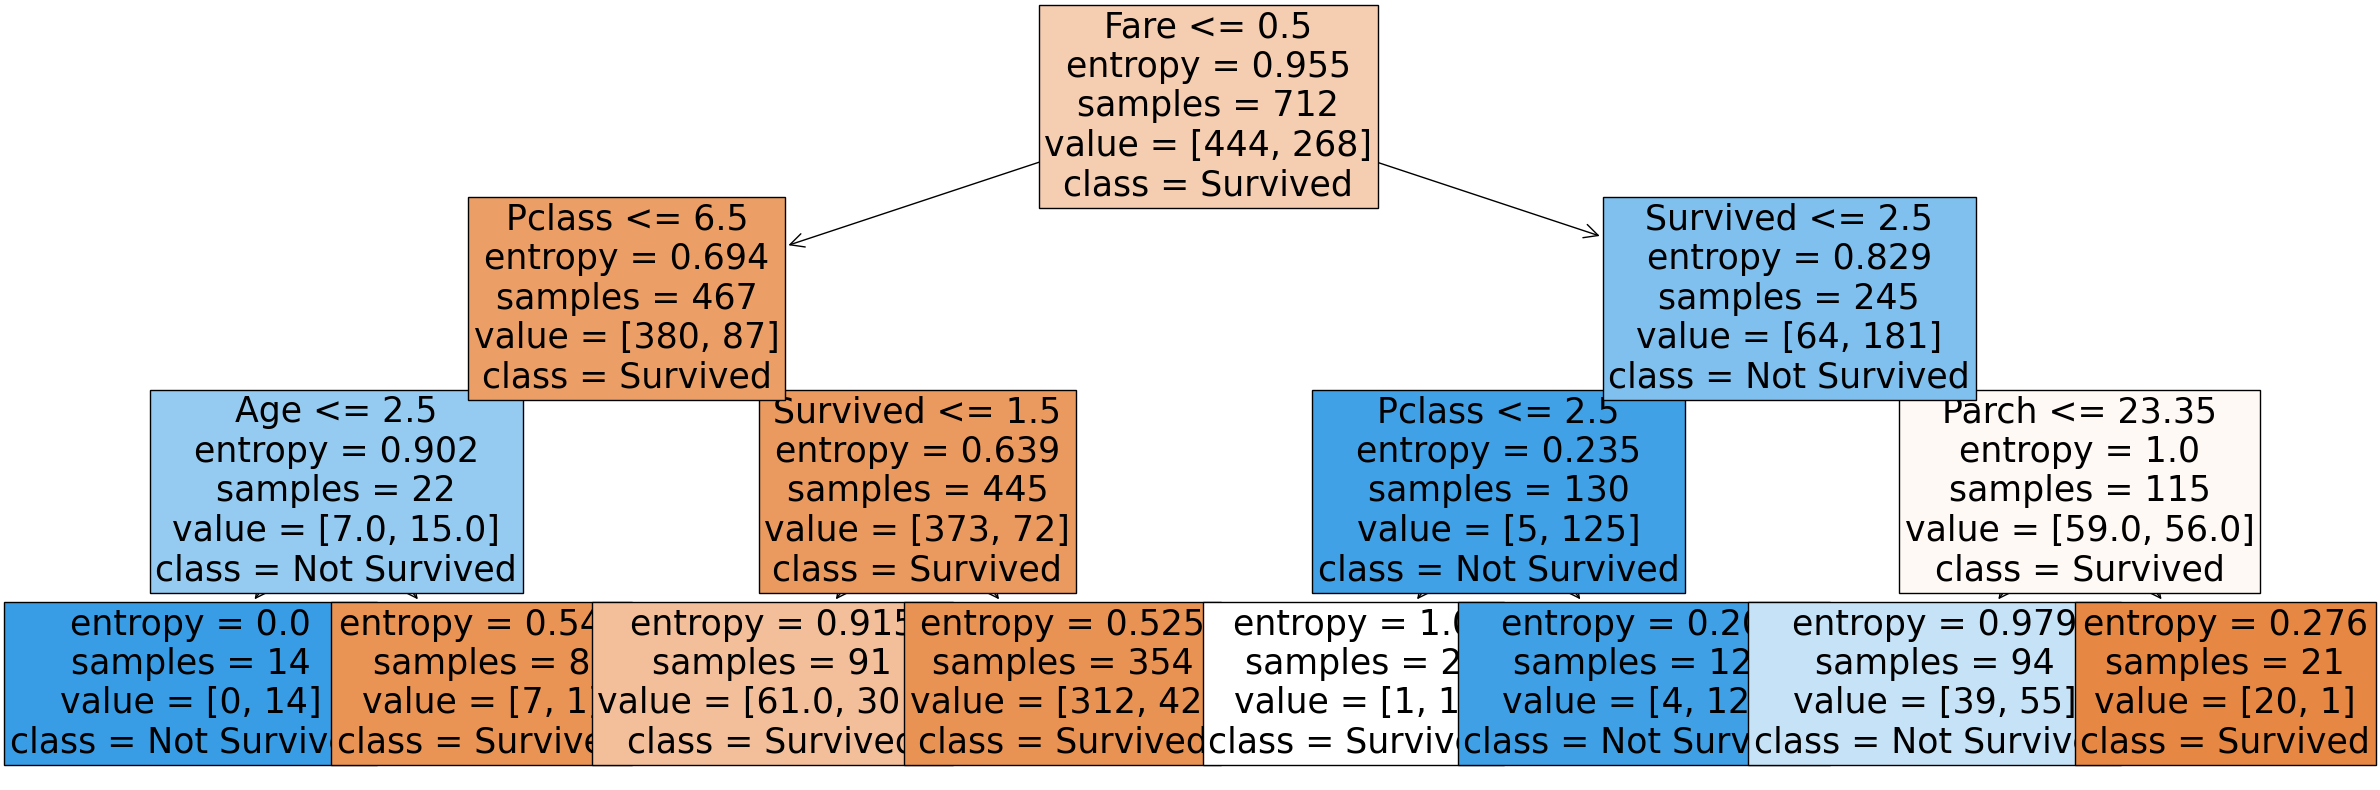

In [488]:
plt.figure(figsize=(30,10))
features = titanic_df.columns
classes = ['Survived', 'Not Survived']
tree.plot_tree(pruned, feature_names=features, class_names=classes, filled=True, fontsize=25)
plt.show()
# Decision tree with optimal max_depth imposed on depth of the tree

In [489]:
trees = np.arange(2,10,1) # Computing for trees up to a tree depth of 10

pd.set_option('future.no_silent_downcasting', True)

solution = pd.DataFrame(index=trees, columns=['development accuracy', 'train accuracy'])
# Storing values of development and training accuracy

solution.index.name='tree depth'
solution = solution.fillna(0)

best_depth = None # Recording the best performing tree
best_accuracy = 0 # Recording the best validation accuracy

for i in trees:
    DT = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_validate(DT,X,y, cv=4,scoring=('accuracy'), return_train_score=True)
    training_accuracy = scores['train_score'].mean()
    development_accuracy = scores['test_score'].mean()
    solution.loc[i, 'train accuracy'] = training_accuracy
    solution.loc[i, 'development accuracy'] = development_accuracy
    if best_accuracy < development_accuracy:
        best_accuracy = development_accuracy
        best_DT = DT

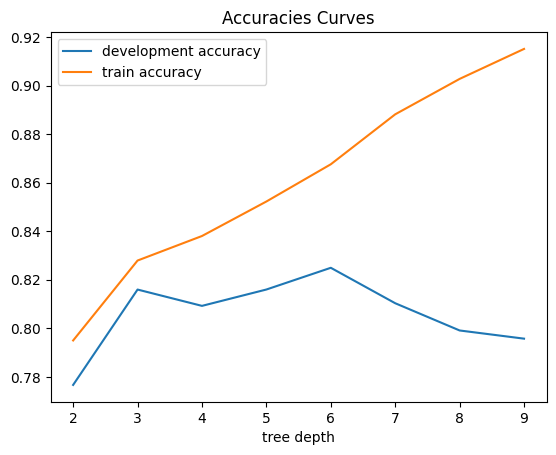

In [490]:

solution.plot()
plt.title('Accuracies Curves')
plt.show()
# Plotting accuracies for each tree depth

For the Decision Tree, there is a significant gap between training and development accuracy with tree depths over 3 and it grows beyond depth of 6. The training accuracy line is linear and development accuracy peaks at 6 depth.

In [491]:
# Create a Decision Tree Classifier and tree depth of 3
final_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the Decision Tree for test dataset
final_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [492]:
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Model Accuracy, how often is the classifier correct
print("Final_sec Training Accuracy:",accuracy_score(y_train, y_train_pred))
print("Final_sec Testing Accuracy:",accuracy_score(y_test, y_test_pred))

Final_sec Training Accuracy: 0.8342696629213483
Final_sec Testing Accuracy: 0.7666666666666667


### Created a bagged, random forest, and boosted tree for the Titanic data set

In [493]:
model_bag = BaggingClassifier()
model_bag.fit(X_train,y_train)
# Fit the bagging model for the titanic dataset

BaggingClassifier()

In [494]:
y_bag_pred = model_bag.predict(X_train)
# Prediction with training data for the bagged model.

print(f'Model 1 - Bagging Accuracy : {accuracy_score(y_train, y_bag_pred)}')

Model 1 - Bagging Accuracy : 0.9606741573033708


#### Comparion model, created Random Forest model

In [495]:
ran = RandomForestClassifier()
ran.fit(X_train,y_train)
# Fit the Randomforest model for the titanic dataset

RandomForestClassifier()

In [496]:
y_rand_pred= ran.predict(X_train)
# Prediction with training data for the Random Forest model

print(f'Model 2 - Random Forest Accuracy : {accuracy_score(y_train, y_rand_pred)}')

Model 2 - Random Forest Accuracy : 0.9789325842696629


In [497]:
ada = AdaBoostClassifier(algorithm="SAMME")
ada.fit(X_train, y_train)
# Fit the Boost classsifier for the titanic dataset

AdaBoostClassifier(algorithm='SAMME')

In [498]:
y_ada_pred=clf.predict(X_train)
# Prediction with training data.

print(f'Model 3 - Boost Accuracy : {accuracy_score(y_train, y_ada_pred)}')

Model 3 - Boost Accuracy : 0.9789325842696629


In [568]:
feature_names = X.columns
importances = ran.feature_importances_
# Finding the Random Forest feature importance

In [569]:
feat_imp = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feat_imp

Feature  Gini Importance
4        Fare         0.256256
1         Age         0.246048
5  Sex_female         0.145597
6    Sex_male         0.144762
0      Pclass         0.088982
2       SibSp         0.047057
3       Parch         0.035911
9  Embarked_S         0.016192
7  Embarked_C         0.012001
8  Embarked_Q         0.007194

Text(0, 0.5, 'Features')

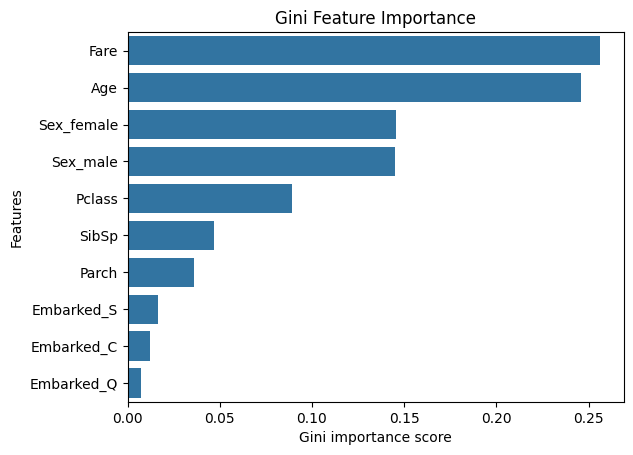

In [570]:
sns.barplot(x=feat_imp['Gini Importance'],y=feat_imp['Feature'],data=feat_imp)
plt.title("Gini Feature Importance")
plt.xlabel("Gini importance score")
plt.ylabel("Features")

From Random Forest, we can see the Fare feature contribute the most.

#### Picked the Random Forest model, and tuned the parameters n_estimators and max_depth

In [578]:
# Hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

params = {
    'max_depth': [17,18,20,25],
    'n_estimators': [200,250,300,350,400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [17, 18, 20, 25],
                         'n_estimators': [200, 250, 300, 350, 400]},
             scoring='accuracy', verbose=1)

In [579]:
#Check best score hyperparameters
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best

0.8047752808988764


RandomForestClassifier(max_depth=17, n_estimators=250, random_state=0)

In [580]:
ran1 = RandomForestClassifier(n_estimators=250, max_depth = 17, random_state=0)
ran1.fit(X_train, y_train)
# Fit the model with n_estimators and max_depth

RandomForestClassifier(max_depth=17, n_estimators=250, random_state=0)

In [581]:
y_rand1_pred = ran1.predict(X_train)
# Prediction with training data.

print(f'Model 4 - Random forest with (n_est and max_depth) Accuracy : {accuracy_score(y_train, y_rand1_pred)}')

Model 4 - Random forest with (n_est and max_depth) Accuracy : 0.9789325842696629


In [582]:

print(f'Model 1 - Bagging Accuracy : {accuracy_score(y_train, y_bag_pred)}')
print(f'Model 2 - Boost Accuracy : {accuracy_score(y_train, y_ada_pred)}')
print(f'Model 3 - Random Forest Accuracy : {accuracy_score(y_train, y_rand_pred)}')
print(f'Model 4 - Random forest with (n_est and max_depth) Accuracy : {accuracy_score(y_train, y_rand1_pred)}')

Model 1 - Bagging Accuracy : 0.9606741573033708
Model 2 - Boost Accuracy : 0.9789325842696629
Model 3 - Random Forest Accuracy : 0.9789325842696629
Model 4 - Random forest with (n_est and max_depth) Accuracy : 0.9789325842696629


After comparing all the models, we can see that Model 2 - Boost Accuracy is as good as the other two, Random Forest and Random Forest tune they have higher accuracy prediction as compare to the Bagging.